In [1]:
# Here We will attempt to repeat the same model as previous but with a fixed (but Random) Unitary
# sandwitched between the CNOT gates and tuned by the parameter \alpha (just as before) 

#Loading Packages

using LinearAlgebra 
using Kronecker
using Plots
using Random, Distributions


(process:21932): GLib-GIO-WARNING **: 00:12:30.850: Unexpectedly, UWP app `KDEe.V.Okular_22.800.1121.0_x64__7vt06qxq7ptv8' (AUMId `KDEe.V.Okular_7vt06qxq7ptv8!KDEe.V.Okular') supports 5 extensions but has no verbs


In [2]:


# The X,Y,Z Gates:

X = [0 1 ; 1 0 ];
Y = [0 -1im ; im 0 ];
Z = [1 0 ; 0 -1 ];



# The Hadamard and the S,T phase gates:

H=1/sqrt(2)*[1 1 ; 1 -1];
S=[1 0; 0 im];
T=[1 0; 0 exp(im*pi/4)];


#The Rotations around X,Y,Z gates:


function RX(r)
    exp(-im*r/2*X)
end

function RY(r)
    exp(-im*r/2*Y)
end

function RZ(r)
    exp(-im*r/2*Z)
end



#The Two Body gates:


CNOT=[1 0 0 0; 0 1 0 0; 0 0 0 1; 0 0 1 0];
REVCNOT=kronecker(H, H)*CNOT*kronecker(H, H);

In [7]:
#The Random Field (Note the required Nesting):





#We will define one particular Unitary Parametrised by the angle \alpha
#which will then be sandwitched between two CNOTs to create non-trivial dynamics

RH=fill(0.1+im, 2,2); #Random Hermitian

RU=fill(fill(0.1+im, 2,2), 11); #Random Unitary
FU=fill(fill(0.1+im, 4,4), 11); #Random Unitary
RUZ=fill(fill(0.1+im, 2,2), 12); #Random Unitary



#Generating a GUE:

l = Normal(0, 0.50);   #off diagonal elements
d = Normal(0, 1.00);   #diagonal elements


    A=rand(l,2,2)+im*rand(l,2,2);
    for i in 1:dim(A)
        A[i,i]=rand(d)+im*rand(d);
    end
    
#Symmetrisation:
    
    RH=(A+A')/2;


In [4]:
Alp1=rand(11);

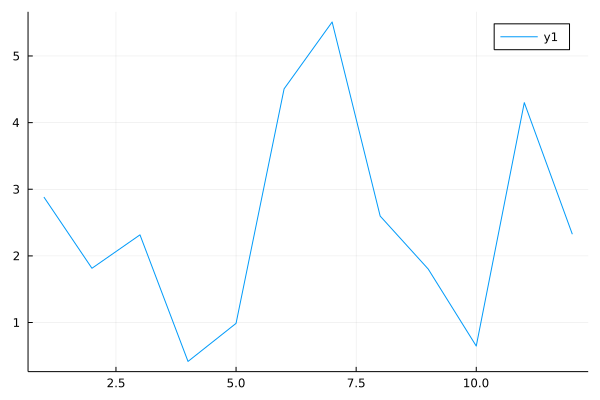

In [5]:
#Creating the Fields in Z direction:


#Generating a Random Field in Z direction:

h=rand(12)*2*pi;
for j in 1:length(RUZ)
    
#Symmetrisation and Exponentiation:
    RUZ[j]=RZ(h[j]);
end

plot(h)


In [9]:
#Preparing the Kronecker Products for the Unitary

o=pi;
XRow=copy(kronecker(RX(o),RX(o),RX(o),RX(o),RX(o),RX(o),RX(o),RX(o),RX(o),RX(o),RX(o),RX(o)));
ZRowF=copy(kronecker(RUZ[1],RUZ[2],RUZ[3],RUZ[4],RUZ[5],RUZ[6],RUZ[7],RUZ[8],RUZ[9],RUZ[10],RUZ[11],RUZ[12]));

In [10]:
ordpar=fill(0.1,157);

#Looping:

for al in 1:length(ordpar)
    
    alpha=0.02*(al-1);
    Alp=Alp1*alpha;
    
    for j in 1:length(RU)  
        RU[j]=exp(im*Alp[j]*RH);
        FU[j]=CNOT*kronecker(RU[j],RU[j])*CNOT;
    end
    
    UOdd=copy(kronecker(FU[1],FU[2],FU[3],FU[4],FU[5],FU[6]));
    UEven=copy(kronecker(I(2),FU[7],FU[8],FU[9],FU[10],FU[11],I(2)));

    A=XRow*UEven*UOdd*ZRowF;
    
    
    
      
   
    
    EigA=eigvals(A);
    N=fill(0.1,length(EigA))


        for i in 1:length(EigA)
            N[i]=real(log(EigA[i])/(-im));
        end

    N= sort(N,rev=true);
    EigA1=copy(N);
    ls = deleteat!(EigA1,1);
    la = deleteat!(N,length(N));
    m=copy(la-ls)/mean(la-ls)
    
    
    
    
    n=fill(0.1,length(EigA)-2);

        for i in 1:length(n)
            #n[i]=m[i+1]/m[i];
            n[i]= minimum([m[i], m[i+1]])/maximum([m[i], m[i+1]]);
        end
    
    
    ordpar[al]=mean(n)
    
end


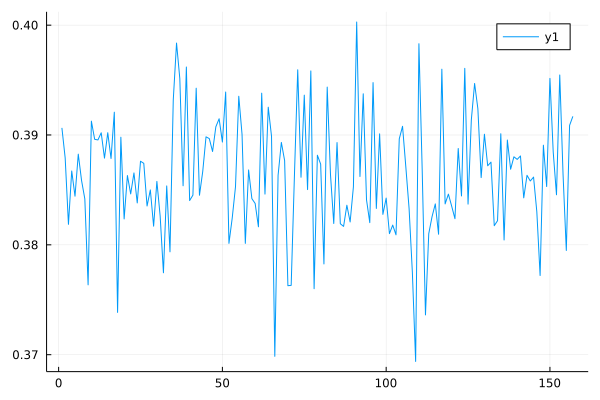

In [11]:
plot(ordpar)

In [12]:
gr()

plot(ordpar)

savefig("tuning_full scan 1.png")